# A CNN classifier for classification of Intel Images

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20,8)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

We will also declare variables that contain the class names and the corresponding label and define the desired IMAGE_SIZE for our pictures. You must define the labels corresponding to the various classes in the dataset

In [3]:
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('C:/Users/vnuna/OneDrive - USN/USN/Data science/2023/Lecture - 4/Code-during-lecture/seg_train',target_size=(img_size, img_size),batch_size=batch_size,shuffle=True,class_mode='sparse')
test_generator = test_datagen.flow_from_directory('C:/Users/vnuna/OneDrive - USN/USN/Data science/2023/Lecture - 4/Code-during-lecture/seg_test',target_size=(img_size, img_size),batch_size=batch_size,shuffle=False,class_mode='sparse')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


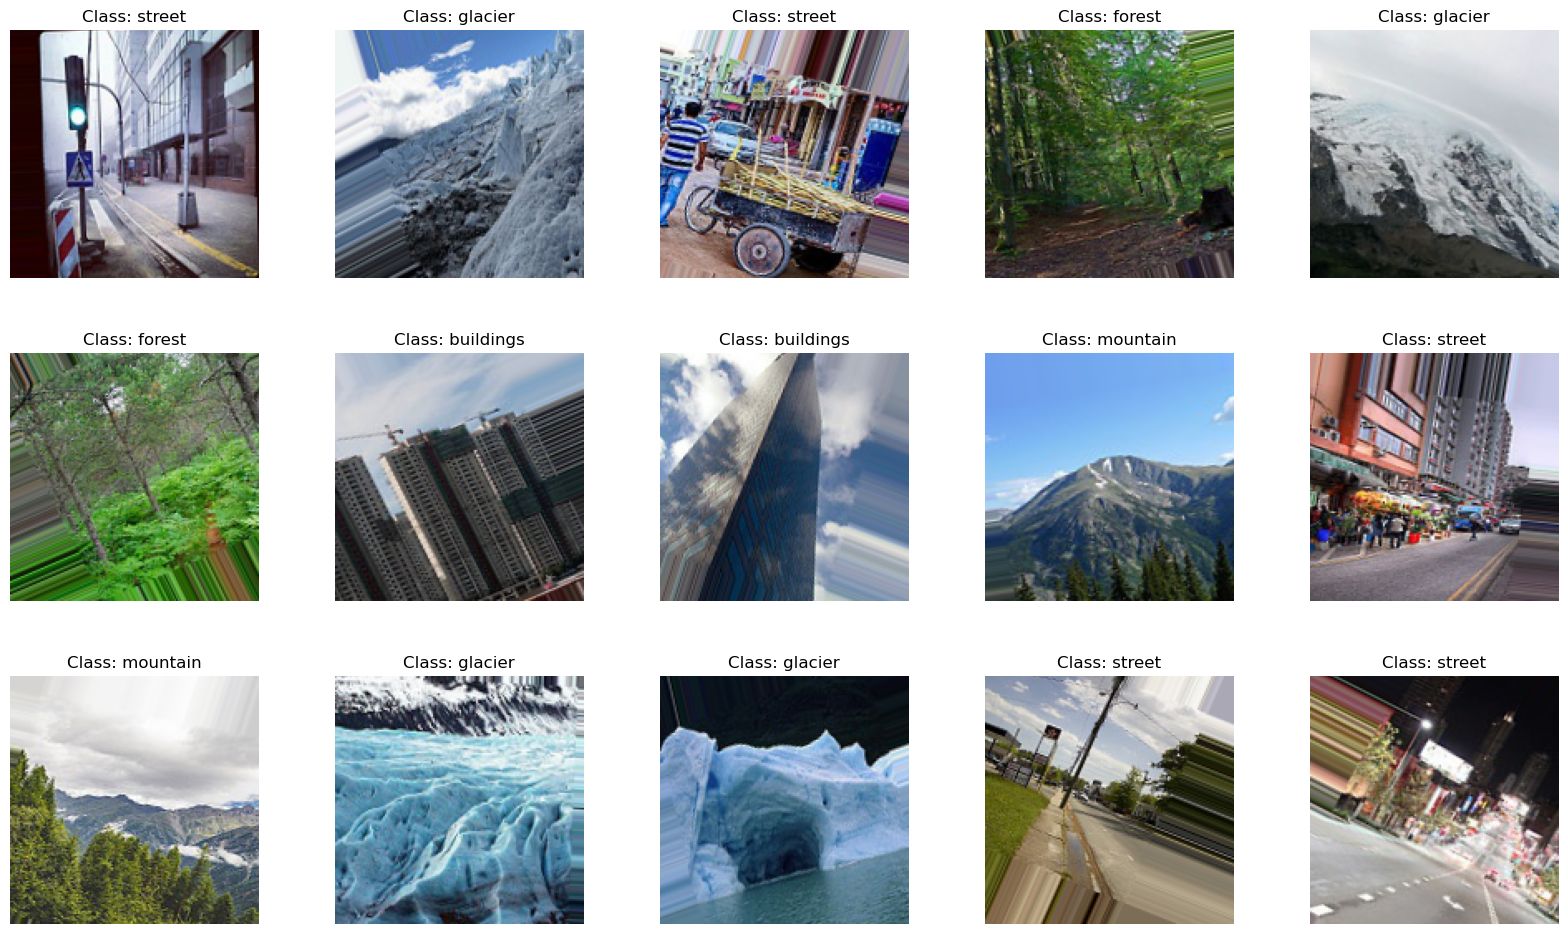

In [4]:
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


samples = train_generator.__next__() 
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')  

We will then call your load_data() function and save your training and testing data. To better train the model, you will shuffle the data in your train dataset. 

# Building CNN model

In [5]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

# Training the model:

In [6]:
history = model.fit(train_generator, validation_data=test_generator, epochs=5) 

Epoch 1/5
439/439 [==============================] - 1227s 3s/step - loss: 1.1251 - accuracy: 0.5487 - val_loss: 0.8020 - val_accuracy: 0.6867
Epoch 2/5
439/439 [==============================] - 1010s 2s/step - loss: 0.8830 - accuracy: 0.6610 - val_loss: 0.6642 - val_accuracy: 0.7590
Epoch 3/5
439/439 [==============================] - 1053s 2s/step - loss: 0.7674 - accuracy: 0.7170 - val_loss: 0.5754 - val_accuracy: 0.7960
Epoch 4/5
439/439 [==============================] - 1007s 2s/step - loss: 0.7114 - accuracy: 0.7413 - val_loss: 0.6559 - val_accuracy: 0.7810
Epoch 5/5
439/439 [==============================] - 1113s 3s/step - loss: 0.6523 - accuracy: 0.7628 - val_loss: 0.7355 - val_accuracy: 0.7400


# Visualising the training loss and accuracies

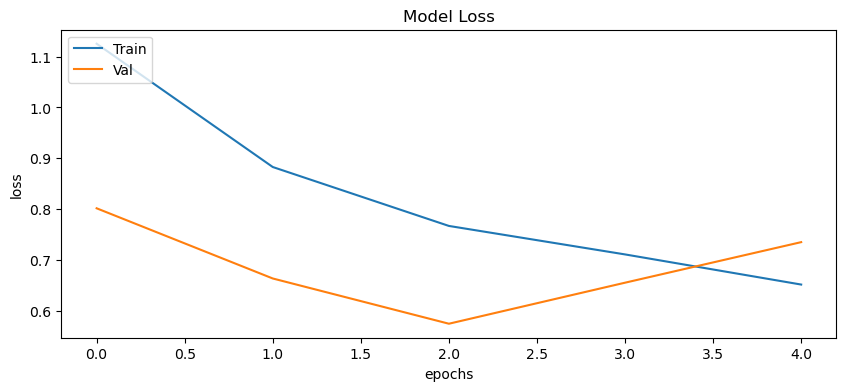

In [7]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

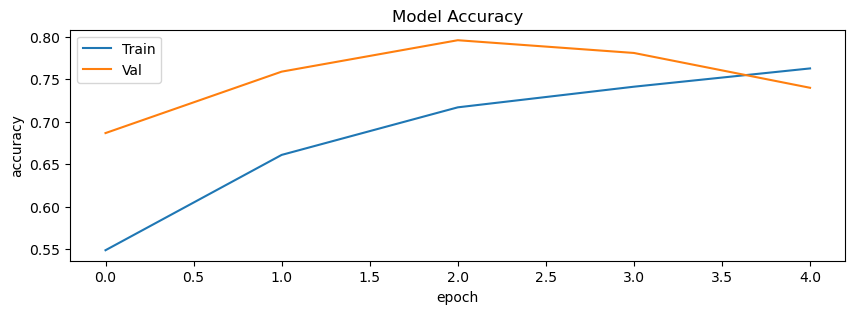

In [8]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Making predictions on the test set:

In [9]:
predictions = model.predict(test_generator)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

print('Predicted classes:', predicted_classes)
print('True labels:', test_generator.classes)

94/94 [==============================] - 40s 422ms/step
Predicted classes: [0 0 0 ... 3 5 5]
True labels: [0 0 0 ... 5 5 5]


# Evaluating model performance:

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy:\n', accuracy_score(test_generator.classes, predicted_classes))

Accuracy:
 0.74


# Classification report:

In [11]:
print('Classification Report:\n', classification_report(test_generator.classes, predicted_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67       437
           1       0.81      0.98      0.89       474
           2       0.83      0.51      0.63       553
           3       0.65      0.78      0.70       525
           4       0.84      0.68      0.75       510
           5       0.67      0.90      0.77       501

    accuracy                           0.74      3000
   macro avg       0.75      0.74      0.73      3000
weighted avg       0.75      0.74      0.73      3000



# Visualising Misclassifications:

In [12]:
print('Confusion Matrix:\n', confusion_matrix(test_generator.classes, predicted_classes))

Confusion Matrix:
 [[270  18   0   9   4 136]
 [  1 465   0   2   0   6]
 [ 36  18 282 143  29  45]
 [ 20  12  37 407  31  18]
 [ 29  30  20  65 345  21]
 [ 14  31   0   4   1 451]]


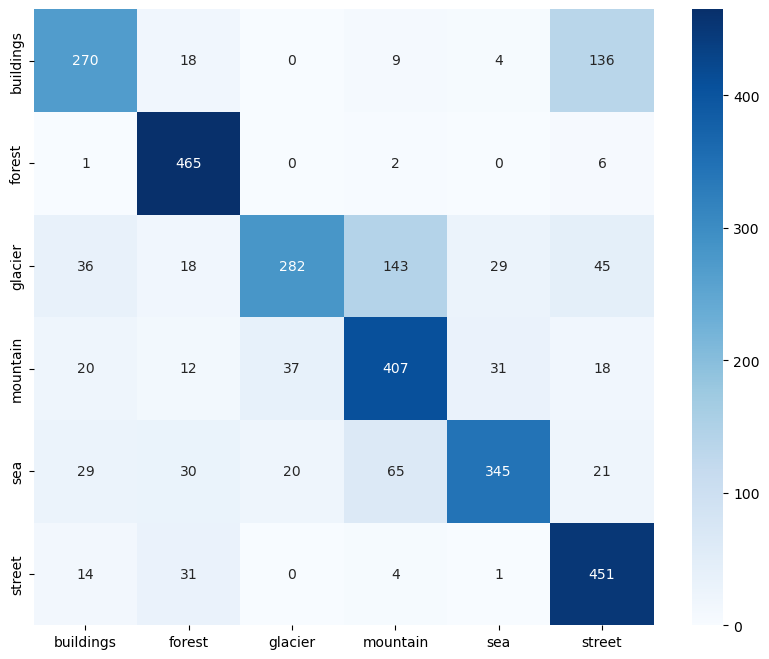

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(test_generator.classes, predicted_classes),annot=True,fmt='.3g',xticklabels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
            yticklabels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],cmap='Blues')
plt.show()

In [14]:
files = test_generator.filenames
data = pd.DataFrame()
data['file'] = files
data['actual_class'] = test_generator.classes
data['predicted_class'] = predicted_classes

In [15]:
misclassification = data[data['actual_class']!=data['predicted_class']]

In [16]:
len(misclassification)

780

In [17]:
misclassification

,file,actual_class,predicted_class
3,buildings\20064.jpg,0,5
5,buildings\20074.jpg,0,3
10,buildings\20113.jpg,0,5
19,buildings\20231.jpg,0,1
20,buildings\20241.jpg,0,5
...,...,...,...
2956,street\23973.jpg,5,1
2971,street\24101.jpg,5,0
2977,street\24139.jpg,5,1
2984,street\24199.jpg,5,1
